<a href="https://colab.research.google.com/github/preenet/961733-EnergyDataAnalytics/blob/master/9717333_Week_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Import dataset

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/'
df = pd.read_excel(data_path+'ENB2012_data.xlsx')

In [0]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 2. Prepocessing  
Transformation for ordinal vars

In [0]:
from sklearn.preprocessing import MinMaxScaler

x5 = pd.get_dummies(df['X5'], prefix='X5', dtype= float)
df = pd.concat([df, x5], axis =1)

x6 = pd.get_dummies(df['X6'], prefix='X6', dtype= float)
df = pd.concat([df, x6], axis =1)

x8 = pd.get_dummies(df['X8'], prefix='X8', dtype= float)
df = pd.concat([df, x8], axis =1)

# now drop the original columns
df.drop(['X5'],axis=1, inplace=True)
df.drop(['X6'],axis=1, inplace=True)
df.drop(['X8'],axis=1, inplace=True)

In [0]:
df.head()

,X1,X2,X3,X4,X7,Y1,Y2,X5_3.5,X5_7.0,X6_2,X6_3,X6_4,X6_5,X8_0,X8_1,X8_2,X8_3,X8_4,X8_5
0,0.98,514.5,294.0,110.25,0.0,15.55,21.33,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.98,514.5,294.0,110.25,0.0,15.55,21.33,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.98,514.5,294.0,110.25,0.0,15.55,21.33,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.98,514.5,294.0,110.25,0.0,15.55,21.33,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.90,563.5,318.5,122.50,0.0,20.84,28.28,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# normalized with minmax algorithm
scaler = MinMaxScaler(feature_range=(-1,1))
normalized_df = scaler.fit_transform(df)


# Modeling
Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

In [0]:
from sklearn import preprocessing
# we are going to predict the heating load 'y1'

Y = normalized_df[:, 5]
X = np.delete(normalized_df, np.s_[5:7], axis=1)

# normalize the data attributes


In [0]:
X.shape

(768, 17)

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 10, shuffle = True, random_state =False)
cv_scores_test = []
testing_error = []

# We are going to try only three parems as follows:

# hidden_layer_sizestuple, length = n_layers - 2, default=(100,)

# WEKA: There are also wildcard values: 'a' = (attribs + classes) / 2, 'i' = attribs, 'o' = classes , 't' = attribs + classes.

# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

# For small datasets, however, ‘lbfgs’ can converge faster and perform better.
mlr = MLPRegressor(hidden_layer_sizes = (35,), activation = 'relu', solver = 'adam', learning_rate_init = 0.3, momentum = 0.2, max_iter = 1000,  random_state=0)
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  
  history = mlr.fit(X_train, y_train)
  y_test_pred = mlr.predict(X_test)      
  
  cv_scores_test = mean_absolute_error(y_test, y_test_pred)
  print(cv_scores_test)
  testing_error.append(cv_scores_test)

0.14268826149806602
0.1198826104977747
0.12169098416929051
0.11743932652291098
0.11948746202295633
0.13397374689233388
0.0997322645869177
0.13455497165256777
0.14387980380993393
0.11724658646157093


In [0]:
print('crosss validation MAE. is:', np.mean(testing_error))

crosss validation MAE. is: 0.12505760181143227


## Data Viz

In [0]:
# comparing CV scores, train and test scores
import matplotlib.pyplot as plt
mlr

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(35,), learning_rate='constant',
             learning_rate_init=0.3, max_fun=15000, max_iter=1000, momentum=0.2,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_test_pred 

array([-0.38821561, -0.82854192, -0.81901641,  0.11339477,  0.03753814,
        0.5385088 , -0.73253196, -0.74247319, -0.66206296, -0.68684506,
       -0.66319616, -0.03650893,  0.18100727,  0.41049028, -0.69118916,
       -0.04675506,  0.05741921, -0.81303594, -0.70917766, -0.71168825,
       -0.06446689,  0.01018101,  0.00154384,  0.13255847, -0.761599  ,
       -0.71454005, -0.69113   ,  0.12183296,  0.10822253, -0.78352303,
       -0.62404867, -0.60177717, -0.530096  ,  0.57401397,  0.18916446,
        0.20750119,  0.29231815, -0.65140246, -0.48618504, -0.5310097 ,
        0.20502029,  0.30160846, -0.76418907, -0.63224265,  0.17486824,
        0.10721336, -0.72291561,  0.32515935,  0.38871311,  0.47595101,
        0.82907339,  0.71601301, -0.61333242, -0.54035283,  0.72377552,
       -0.61767653, -0.59539967, -0.48157145,  0.36498575,  0.28912912,
        0.38779942, -0.61452672,  0.27035013,  0.36643022,  0.36597714,
       -0.67798264, -0.63092369, -0.61218262, -0.55637858, -0.40

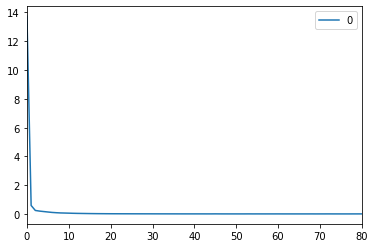

In [0]:
ts = pd.DataFrame(mlr.loss_curve_).plot()

# MLP with Karas Framework

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [0]:
input_dim = X.shape[1]
def mlp_regressor_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

  

In [0]:
# evaluate model
estimators = []
estimators.append(('mlp-regressor', KerasRegressor(build_fn = mlp_regressor_model, epochs=100, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print('crosss validation MAE. is:', np.mean(results))

Epoch 1/100
691/691 [==============================] - 2s 2ms/step - loss: 0.1483
Epoch 2/100
691/691 [==============================] - 0s 608us/step - loss: 0.0249
Epoch 3/100
691/691 [==============================] - 0s 617us/step - loss: 0.0211
Epoch 4/100
691/691 [==============================] - 0s 706us/step - loss: 0.0208
Epoch 5/100
691/691 [==============================] - 1s 730us/step - loss: 0.0205
Epoch 6/100
691/691 [==============================] - 0s 627us/step - loss: 0.0200
Epoch 7/100
691/691 [==============================] - 0s 590us/step - loss: 0.0203
Epoch 8/100
691/691 [==============================] - 0s 579us/step - loss: 0.0200
Epoch 9/100
691/691 [==============================] - 0s 555us/step - loss: 0.0195
Epoch 10/100
691/691 [==============================] - 0s 568us/step - loss: 0.0193
Epoch 11/100
691/691 [==============================] - 0s 622us/step - loss: 0.0187
Epoch 12/100
691/691 [==============================] - 1s 728us/step - loss